<a href="https://colab.research.google.com/github/BenJoshMudi/GOMYCODE.BEN/blob/main/Hierachical_and_Kmeans_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **LOADING THE DATASET**

In [2]:
df = pd.read_csv('Credit_card_dataset.csv')

In [3]:
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


## **CHECKING FOR MISSING VALUES**

In [5]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

## **SELECTING THE PURCHASE AND CREDIT_LIMIT FEATURES**

In [6]:

X = df.iloc[:, [2, 4]]
X

,PURCHASES,CREDIT_LIMIT
0,95.40,1000.0
1,0.00,7000.0
2,773.17,7500.0
3,1499.00,7500.0
4,16.00,1200.0
...,...,...
8945,291.12,1000.0
8946,300.00,1000.0
8947,144.40,1000.0
8948,0.00,500.0


## **FILLNA WITH ZERO**

In [7]:
X['CREDIT_LIMIT'] = X['CREDIT_LIMIT'].fillna(0)

<ipython-input-7-a9ead3e7b410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CREDIT_LIMIT'] = X['CREDIT_LIMIT'].fillna(0)


In [8]:
X.isnull().sum()

PURCHASES       0
CREDIT_LIMIT    0
dtype: int64

In [9]:
X

,PURCHASES,CREDIT_LIMIT
0,95.40,1000.0
1,0.00,7000.0
2,773.17,7500.0
3,1499.00,7500.0
4,16.00,1200.0
...,...,...
8945,291.12,1000.0
8946,300.00,1000.0
8947,144.40,1000.0
8948,0.00,500.0


# **Dendrogram to find optimal number of Clusters**

Text(0, 0.5, 'Euclidean distance')

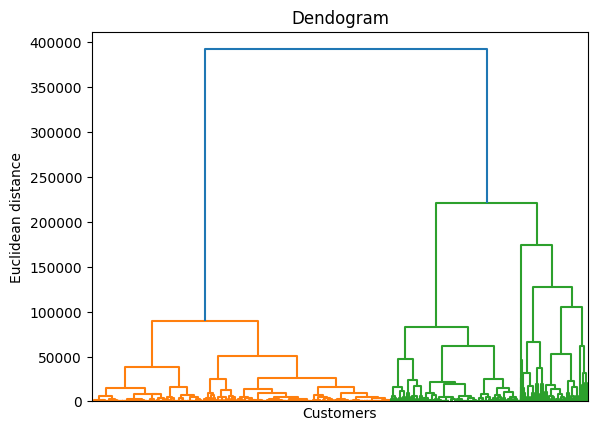

In [10]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method='ward', metric='euclidean'), no_labels=True)
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')

## **BUILDING THE HIERACHICAL MODEL**

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X)

## **PLOTTING THE CLUSTERS**

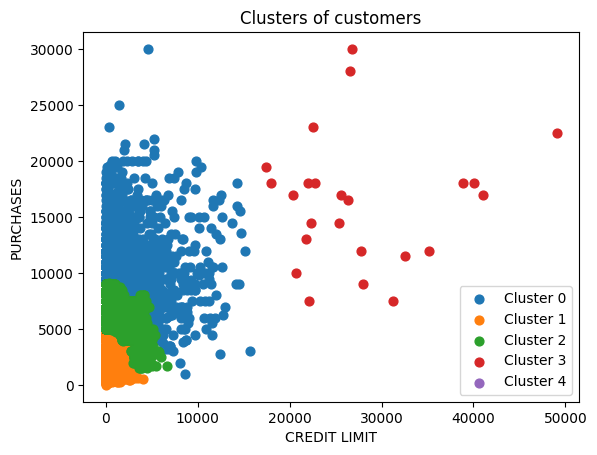

In [20]:
for i in range(5):
    plt.scatter(X.values[hc_labels == i, 0], X.values[hc_labels == i, 1], s=40, label='Cluster ' + str(i))

plt.title('Clusters of customers')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [13]:
import sklearn
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [14]:
# Create function to work out optimus number of clusters

def optimise_k_means(data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
    import sklearn
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  #Generate the elbow plot
  fig = plt.subplots(figsize=(10,5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

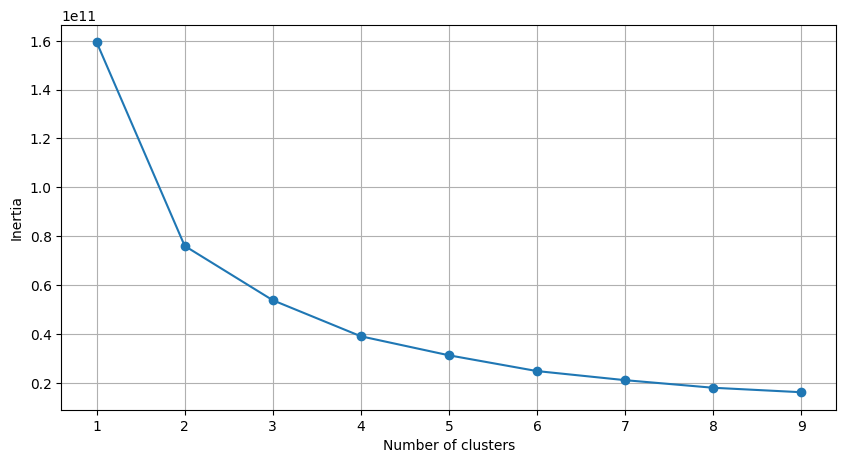

In [15]:
optimise_k_means(X[['PURCHASES', 'CREDIT_LIMIT']], 10)

In [21]:
kmeans = KMeans(n_clusters=4)
y = kmeans.fit(X[['PURCHASES', 'CREDIT_LIMIT']])

X['Kmeans=3'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-2702a6f631aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Kmeans=3'] = kmeans.labels_


In [22]:
X.head()

,PURCHASES,CREDIT_LIMIT,Kmeans=3
0,95.40,1000.0,2
1,0.00,7000.0,0
2,773.17,7500.0,0
3,1499.00,7500.0,0
4,16.00,1200.0,2


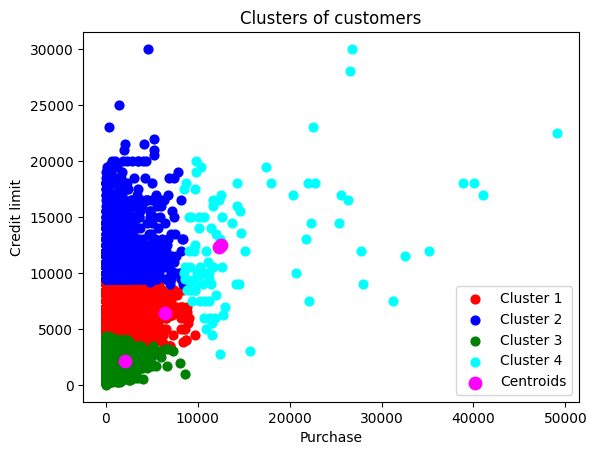

In [23]:
plt.scatter(X.values[y.labels_ == 0, 0], X.values[y.labels_ == 0, 1], s=40, c='red', label='Cluster 1')
plt.scatter(X.values[y.labels_ == 1, 0], X.values[y.labels_ == 1, 1], s=40, c='blue', label='Cluster 2')
plt.scatter(X.values[y.labels_ == 2, 0], X.values[y.labels_ == 2, 1], s=40, c='green', label='Cluster 3')
plt.scatter(X.values[y.labels_ == 3, 0], X.values[y.labels_ == 3, 1], s=40, c='cyan', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], s=80, c='magenta', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Purchase')
plt.ylabel('Credit limit')
plt.legend()
plt.show()

In this dataset, customer spending behavior relative to their credit limits varies widely. For instance, some customers with a credit limit of up to $5,000

have made purchases totaling $5000, indicating they have significantly exceeded their credit limits.

Conversely, there are customers with a credit limit of $20,000 who have not utilized their full credit potential, making purchases well below their credit limit.

Interestingly, there are also customers with a credit limit of $20,000 who have made purchases that exceed this amount, showcasing diverse spending habits.

And so on...

These patterns highlight the different ways customers utilize their credit, regardless of the limits set by financial institutions.

By analyzing this data, we can gain insights into how different clusters of customers manage their credit limits and spending, which can be valuable for tailoring financial products and credit offerings.



From the above, Customers are grouped based on Credit Limit and number of purchases.